# 보스톤 집값 예측하기(단순선형회귀)

In [1]:
#주요 모듈 임포트
import pandas as pd 
import statsmodels.formula.api as smf

## 1. 데이터불러오기

In [2]:
# 데이터 불러오기
# Colab에서는 파일의경로명을 해당 파일 옆에 점 세개 버튼의 경로 복사로 복사해 사용
# 예) boston = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI_3주차_실습파일_오프라인/Boston_house.csv")
boston = pd.read_csv("./Boston_house.csv")
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [3]:
'''
타겟 데이터
1978 보스턴 주택 가격
506개 타운의 주택 가격 중앙값 (단위 1,000 달러)

특징 데이터
CRIM: 범죄율
INDUS: 비소매상업지역 면적 비율
NOX: 일산화질소 농도
RM: 주택당 방 수
LSTAT: 인구 중 하위 계층 비율
B: 인구 중 흑인 비율
PTRATIO: 학생/교사 비율
ZN: 25,000 평방피트를 초과 거주지역 비율
CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
AGE: 1940년 이전에 건축된 주택의 비율
RAD: 방사형 고속도로까지의 거리
DIS: 직업센터의 거리
TAX: 재산세율'''

'\n타겟 데이터\n1978 보스턴 주택 가격\n506개 타운의 주택 가격 중앙값 (단위 1,000 달러)\n\n특징 데이터\nCRIM: 범죄율\nINDUS: 비소매상업지역 면적 비율\nNOX: 일산화질소 농도\nRM: 주택당 방 수\nLSTAT: 인구 중 하위 계층 비율\nB: 인구 중 흑인 비율\nPTRATIO: 학생/교사 비율\nZN: 25,000 평방피트를 초과 거주지역 비율\nCHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0\nAGE: 1940년 이전에 건축된 주택의 비율\nRAD: 방사형 고속도로까지의 거리\nDIS: 직업센터의 거리\nTAX: 재산세율'

In [4]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AGE      506 non-null    float64
 1   B        506 non-null    float64
 2   RM       506 non-null    float64
 3   CRIM     506 non-null    float64
 4   DIS      506 non-null    float64
 5   INDUS    506 non-null    float64
 6   LSTAT    506 non-null    float64
 7   NOX      506 non-null    float64
 8   PTRATIO  506 non-null    float64
 9   RAD      506 non-null    int64  
 10  ZN       506 non-null    float64
 11  TAX      506 non-null    int64  
 12  CHAS     506 non-null    int64  
 13  Target   506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
boston.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170,22.532806
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994,9.197104
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000,5.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000,17.025000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000,21.200000
75%,94.075000,396.225000,6.623500,3.677083,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000,25.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000,50.000000


In [6]:
#원본 데이터에서 Target, CRIM, RM, LSTAT만 각각 변수에 따로 가져오기
boston_data = boston[['Target','CRIM','RM','LSTAT']]
boston_data

,Target,CRIM,RM,LSTAT
0,24.0,0.00632,6.575,4.98
1,21.6,0.02731,6.421,9.14
2,34.7,0.02729,7.185,4.03
3,33.4,0.03237,6.998,2.94
4,36.2,0.06905,7.147,5.33
...,...,...,...,...
501,22.4,0.06263,6.593,9.67
502,20.6,0.04527,6.120,9.08
503,23.9,0.06076,6.976,5.64
504,22.0,0.10959,6.794,6.48


## 2. crim(범죄율)에 대한 집값을 예측하기

In [7]:
#OLS(Ordinary Least Square) 가장 기본적인 회귀방법 : 잔차제곱합을 최소화하는 회귀직선 모델을 만들고 학습시키기
model1 = smf.ols(formula='Target~CRIM',data=boston_data).fit()

In [8]:
model1.summary() 

#R-squared : y에 대해 x변수가 얼마나 설명력을 가지느냐를 나타냄 15% , 0~1사이의 값, 클수록 좋음
#그러나 변수가 많아지면 값이 커짐으로 큰 의미가 없음
#회귀계수(coef): CRIM 범죄율 회귀계수 값은 x(범죄율)가 1증가할 때 y는 0.4152 감소
#p-value : 0.05보다 작고 0에 가까울 수록 유의미한 변수

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Wed, 18 Jun 2025   Prob (F-statistic):           1.17e-19
Time:                        08:29:41   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#회귀계수 출력
model1.params

Intercept    24.033106
CRIM         -0.415190
dtype: float64

In [10]:
#predict 함수를 통해 학습데이터에 대해 생성한 모델로 예측값 구하기
pred1=model1.predict() #일반적으로 괄호 안에 X데이터 값을 넣어주나 여기에서는 생략해도 가능
pred1

array([ 24.03048217,  24.02176733,  24.02177563,  24.01966646,
        24.00443729,  24.02071274,  23.99644902,  23.97309042,
        23.94540138,  23.96250722,  23.93973403,  23.98433377,
        23.99416963,  23.77163594,  23.76823138,  23.77261995,
        23.59552468,  23.70751396,  23.69982879,  23.73176107,
        23.51337514,  23.67934745,  23.52139661,  23.62271965,
        23.72160552,  23.68412214,  23.75413567,  23.63627976,
        23.71216824,  23.61689868,  23.56360486,  23.4706396 ,
        23.45682622,  23.55492323,  23.36347899,  24.00646341,
        23.99265003,  23.99983283,  23.96042712,  24.02163447,
        24.01915993,  23.98019433,  23.97435675,  23.96694145,
        23.98216648,  23.96193426,  23.95490093,  23.9379155 ,
        23.92770182,  23.94185981,  23.99626634,  24.01509937,
        24.01085198,  24.01242555,  24.02745959,  24.02766303,
        24.02457401,  24.02716065,  23.96898004,  23.99022532,
        23.97110996,  23.96181385,  23.98732314,  23.98

## 3. 시각화

### 3.1 적합한 직선 그리기

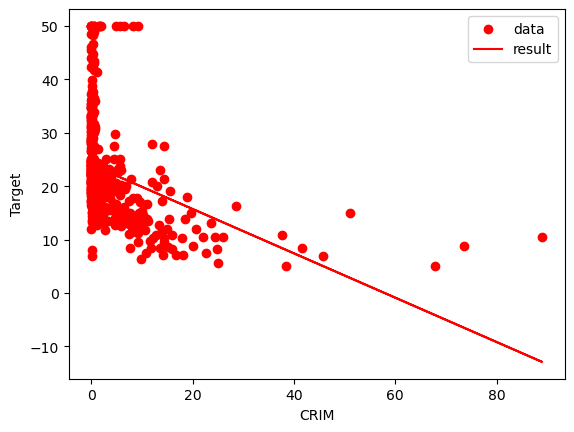

In [11]:
import matplotlib.pyplot as plt

plt.scatter(boston_data['CRIM'],boston_data['Target'],label='data',color='red')
plt.plot(boston_data['CRIM'], pred1,label="result", color='red')
plt.legend()  # 범례출력
plt.xlabel("CRIM")
plt.ylabel("Target")
plt.show()

### 3.2 실제값과 예측값 비교

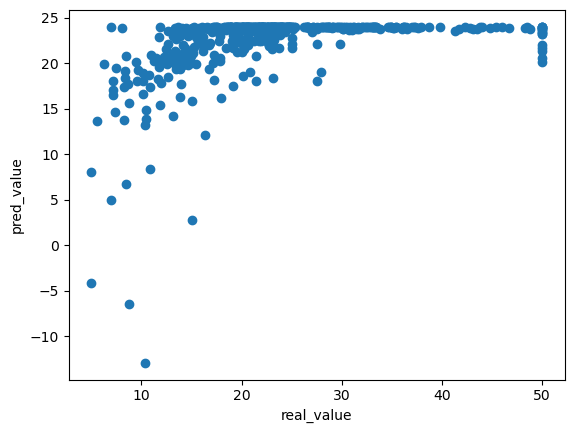

In [12]:
plt.scatter(boston_data['Target'],pred1)
plt.xlabel("real_value")
plt.ylabel("pred_value")
plt.show()

### 3.3 잔차 시각화

In [13]:
#잔차
model1.resid

0      -0.030482
1      -2.421767
2      10.678224
3       9.380334
4      12.195563
         ...    
501    -1.607103
502    -3.414311
503    -0.107879
504    -1.987605
505   -12.113422
Length: 506, dtype: float64

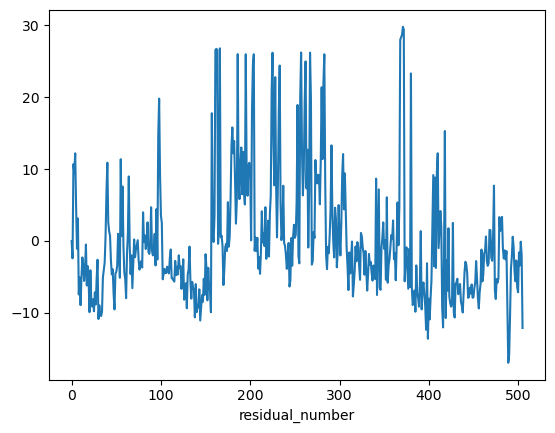

In [14]:
# residual 시각화
model1.resid.plot()
plt.xlabel("residual_number")
plt.show()
#잔차가 균일하지 않아 범죄율로 보스톤 집값을 예측하기에는 무리가 있다.

In [15]:
##잔차의 합계산해보기, 잔차의 합은 0에 수렴
## SSE가 최소가 되게끔 직선을 그음으로 잔차의 합이 0이 되는 조건을 만족하도록 회귀 직선을 그음으로 

sum(model1.resid)

-5.027089855502709e-13

### 3.4 생성한 모델로 새로운 데이터에 대해 예측하기

In [16]:
new_crim = pd.DataFrame({'CRIM':[0.06,0.03,0.02, 0.05]})
new_crim

,CRIM
0,0.06
1,0.03
2,0.02
3,0.05


In [17]:
new_result = model1.predict(new_crim)
print(new_result)

0    24.008195
1    24.020650
2    24.024802
3    24.012347
dtype: float64


## 4. 위와 동일하게 RM(주택당 방 수)과 LSTAT(인구 중 하위 계층 비율)로 회귀모델 model2, model3로 각각 단순선형회귀 해보기

### 4-1 회귀모델 생성하고 학습 시키기

In [18]:
#회귀모델 생성하고 학습시키기
# model2는 formula='Target~RM' , model3는 formula='Target~LSTAT'
model2 = smf.ols(formula='Target~RM',data=boston_data).fit() # 주택당 방 수
model3 = smf.ols(formula='Target~LSTAT',data=boston_data).fit() # 인구 중 하위 계층 비율

In [19]:
#model2(RM)모델 요약 결과 출력
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 18 Jun 2025   Prob (F-statistic):           2.49e-74
Time:                        08:29:43   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
#model3(lstat) 모델 요약 결과 출력
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 18 Jun 2025   Prob (F-statistic):           5.08e-88
Time:                        08:29:43   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## -------------------------------------------------------------------------------------------------------------------------------
## Q.1. 집값에 대한 RM(주택당 방 수) 변수와 LSTAT(인구 중 하위 계층 비율)의 설명력은 각각 몇 %인가?

## A.1. RM: 48.4% ,lstat: 54.4%

## Q.2. RM 변수와 LSTAT 변수가 1단위 증가할 때 집값은 각각 몇 단위 증가 또는 감소 하는가?

## A.2. RM:9.1021 , LSTAT:-0.9500

## Q.3. CRIM, RM, LSTAT 중 집값에 더 영향을 미치는 요인은 무엇인가? 

## A.3. LSTAT

## Q.4. 세 개의 변수 중 하나의 변수만 선택하여 회귀분석에 사용한다면 어떤 변수를 사용해야 하는가?

## A.4. LSTAT

## -------------------------------------------------------------------------------------------------------------------------------

In [21]:
# model1, model2, model3의 회귀계수 출력해 보기, .params 사용
print('model1.params\n',model1.params,'\n')
print('model2.params\n',model2.params,'\n')
print('model3.params\n',model3.params,'\n')

model1.params
 Intercept    24.033106
CRIM         -0.415190
dtype: float64 

model2.params
 Intercept   -34.670621
RM            9.102109
dtype: float64 

model3.params
 Intercept    34.553841
LSTAT        -0.950049
dtype: float64 



### 4-2 model2(RM: 주택당 방수)와 model3(LSTAT: 인구중 하위계층 비율)로 집값 예측하기

In [22]:
# model2와 model3 각각 모델로 예측한 값을 pre2, pre3에 저장하기 predict() 사용
pred2=model2.predict()
pred3=model3.predict()

### 4-3 시각화

#### 1) 적합한 직선그리기

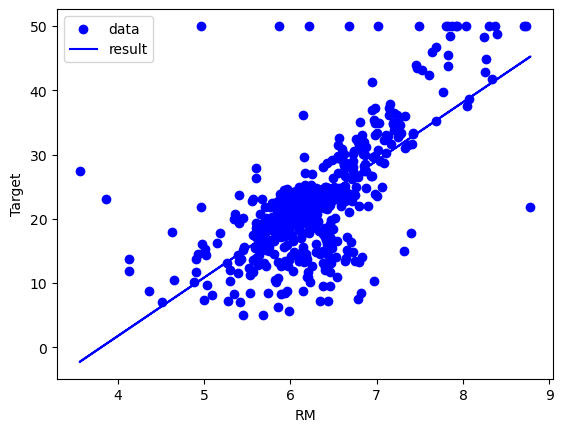

In [23]:
# model2의 예측 직선과 데이터 산점도 그래프로 나타내기 (color='blue'로 나타내기)
import matplotlib.pyplot as plt
plt.scatter(boston_data['RM'],boston_data['Target'],label='data',color='blue')
plt.plot(boston_data['RM'], pred2,label="result", color='Blue')
plt.legend()  # 범례출력
plt.xlabel("RM")
plt.ylabel("Target")
plt.show()

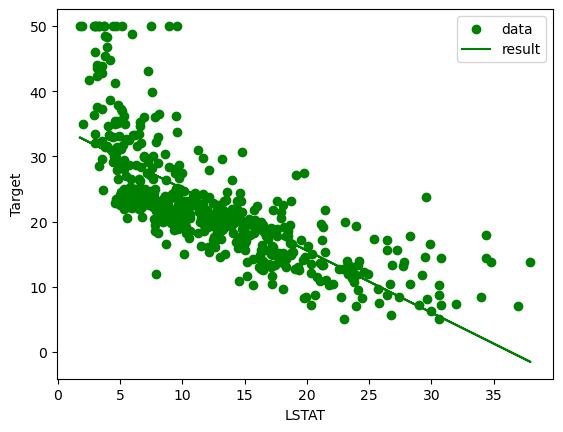

In [24]:
# model3의 예측 직선과 데이터 산점도 그래프로 나타내기 (color='green'로 나타내기)

import matplotlib.pyplot as plt

plt.scatter(boston_data['LSTAT'],boston_data['Target'],label='data',color='green')
plt.plot(boston_data['LSTAT'], pred3,label="result", color='green')
plt.legend()  # 범례출력
plt.xlabel("LSTAT")
plt.ylabel("Target")
plt.show()

#### 2) 잔차 시각화하기

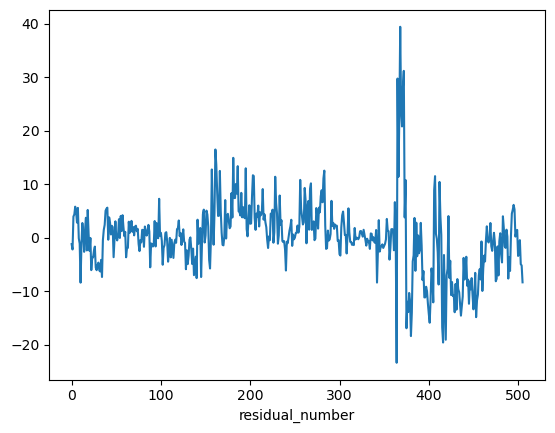

In [25]:
# model2 (rm모델)의 잔차(residual) 시각화 하기
model2.resid.plot()
plt.xlabel("residual_number")
plt.show()

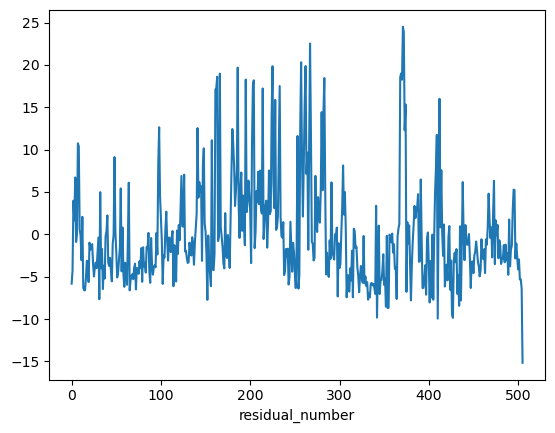

In [26]:
# model 3(Istat 모델)의 잔차(residual) 시각화 하기
model3.resid.plot()
plt.xlabel("residual_number")
plt.show()

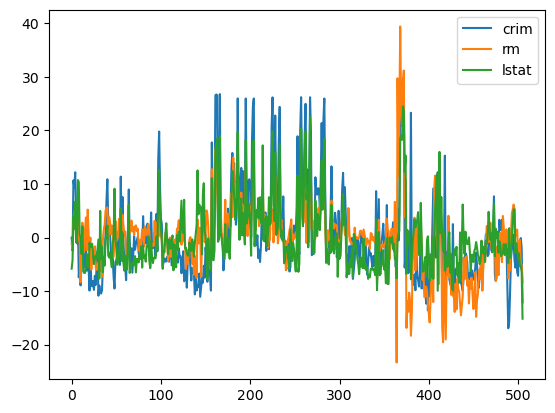

In [27]:
#세 모델의 residual 비교
model1.resid.plot(label="crim")
model2.resid.plot(label="rm")
model3.resid.plot(label="lstat")
plt.legend()
#잔차가 0주변으로 몰려있음

## Q.5. 세 모델 중 잔차가 가장 균등하고 작은 모델은 무엇인가?
## A.5 model3(LSTAT)

# 보스톤 집값 예측하기(다중선형회귀)

In [28]:
#OLS(Ordinary Least Square) 가장 기본적인 회귀방법 : 잔차제곱합을 최소화하는 회귀직선 모델을 만들고 학습시키기
multi_model = smf.ols(formula='Target ~ CRIM + RM + LSTAT',data=boston_data).fit()

In [29]:
# 세 개의 변수의 R-squared를 모두 더하면 1이 넘음 각 변수가 설명하는 부분이 겹침
# 회귀 계수도 줄어들었음
multi_model.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Wed, 18 Jun 2025   Prob (F-statistic):          1.01e-112
Time:                        08:29:44   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
#multi_model로 예측하기
pred4=multi_model.predict()

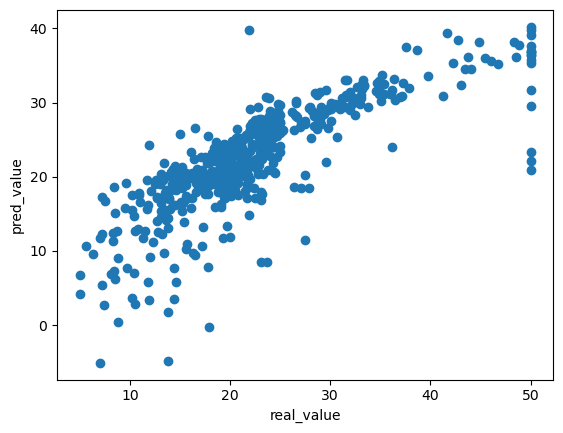

In [31]:
import matplotlib.pyplot as plt
# 실제값과 예측값 시각화
plt.scatter(boston_data[ 'Target' ], pred4)
plt.xlabel('real_value')
plt.ylabel('pred_value')
plt.show()


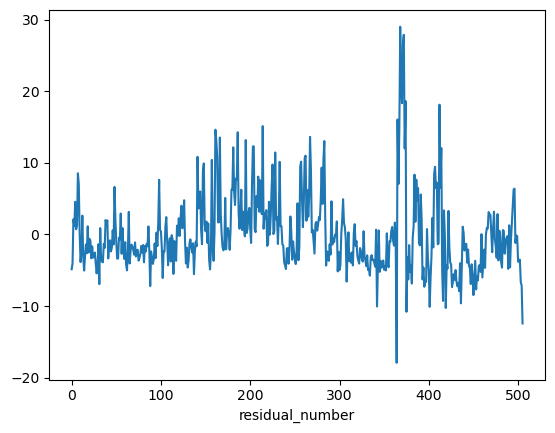

In [32]:
#multi 모델의 잔차보기
multi_model.resid.plot()
plt.xlabel("residual_number")
plt.show()

#### 앞에서 model2, model3 생성 후 보기

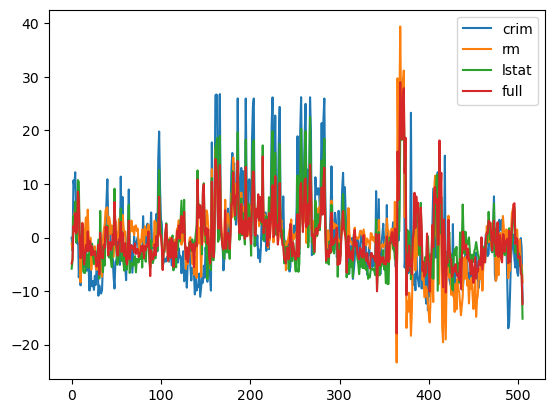

In [33]:
model1.resid.plot(label="crim")
model2.resid.plot(label="rm")
model3.resid.plot(label="lstat")
multi_model.resid.plot(label="full")
plt.legend()
#full 모델이 잔차가 가장 작음
#변수가 많아질수록 R2은 커지고, 잔차가 작아짐